
Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




[1] 87610   540
[1] 61089   540


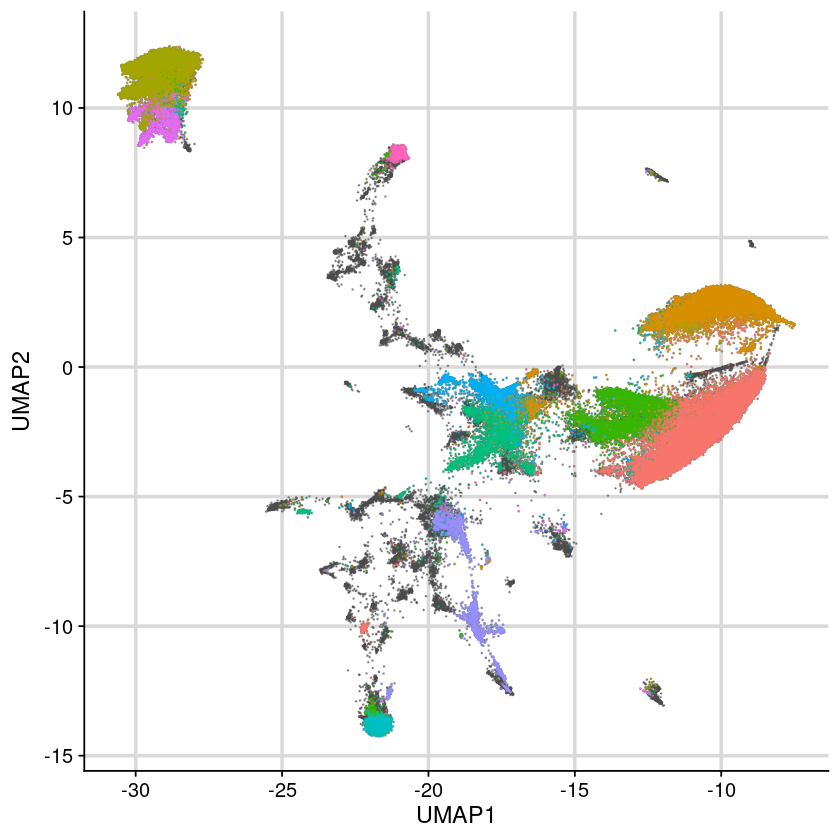

In [3]:
### set environment
library("tidyverse")
library("cowplot")

FD_RES = "/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results"

### import annotation matrix
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary_v2"
)
txt_fname = "matrix.annotation.prepare.cres_vote1_gcfilter.chipseq_full.fcc.tss.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
mat_region_annot_full_cres = dat

### import UMAP/Cluster regions
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary_v2"
)
txt_fname = "umap.cluster.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat_region_umap_cluster = dat

### merge the table
dat = dat_region_umap_cluster
dat = dat %>%
    dplyr::left_join(mat_region_annot_full_cres, by = "Region") %>%
    replace(is.na(.), 0)
dat_region_merge = dat
print(dim(dat)) # 87610   540

### subset the top clusters
dat = dat_region_merge
dat = dat %>% 
    dplyr::filter(Cluster < 10, Cluster >= 0) %>% 
    dplyr::mutate(Cluster = as.character(Cluster))
dat_region_merge_sub = dat
print(dim(dat)) #61089   540

### plot the UMAP plot with cluster labeling
dat1 = dat_region_merge
dat2 = dat_region_merge_sub

gpt = ggplot() +
    geom_point(data=dat1, aes(x=UMAP1, y=UMAP2), color="grey30", size=0.1, alpha=0.5) +
    geom_point(data=dat2, aes(x=UMAP1, y=UMAP2,  color=Cluster), size=0.1, alpha=0.5) +
    #scale_color_brewer(palette = "Set2") +
    theme_cowplot() +
    background_grid(size.major = 1) +
    theme(legend.position = "none")

print(gpt)